In [53]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [55]:
X = mnist.data
y = mnist.target
X_train,X_test,y_train,y_test = train_test_split((X != 0), y,test_size=0.2,random_state=0)
# X_train,X_test,y_train,y_test = X[:6000] != 0, X[6000:7000] != 0, y[:6000], y[6000:7000]

In [56]:
clf = LinearSVC(C=0.00001)

In [57]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8387857142857142

In [58]:
temp2 = clf.intercept_

In [61]:
temp2 *= 1000

In [63]:
temp = clf.coef_

In [64]:
temp *= 1000

In [65]:
lulala = np.array(list(map(int, temp.reshape(-1)))).reshape(10, 784)

In [19]:
def plot_pixels(data):
    pixels = np.reshape(data, (28,28))
#     plt.title('Label is {label}'.format(label=mnist.target[index]))
    plt.imshow(pixels, cmap='gray')
    plt.show()

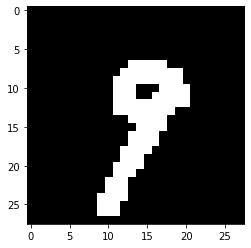

In [13]:
plot_pixels(X_train[1])

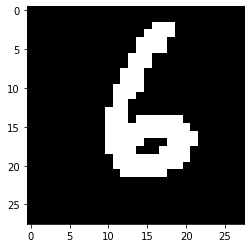

In [21]:
plot_pixels(X_train[2])

In [71]:
for i in range(100):
    weight = np.sum((X_train[i] != 0) * lulala, axis=1)
    print(weight)

[ -964 -1378 -1331 -1509   114  -720  -886  -583  -646  -634]
[-1174  -384  -956  -718  -842  -884  -944  -108  -576  -371]
[-1084  -766  -528  -761  -719  -719   462 -1052  -724  -850]
[-954 -543 -642 -865 -503 -632 -815 -521   28 -545]
[ -631 -1014 -1343  -847  -742   -98  -703  -834  -506  -349]
[-1166   152  -555  -704  -685  -936  -995  -715  -422  -794]
[-1027  -897  -937 -1233  -516  -833  -942  -616  -550  -316]
[-1051 -1231 -1155 -1519 -1029  -901  -211 -1476 -1247 -1020]
[-1515  -564  -802  -821  -887 -1071 -1144  -691  -754  -341]
[-1336  -798 -1177  -695  -815  -674  -904  -606  -695  -238]
[-1142 -1215    94  -786 -1620 -1370 -1214 -1674  -763 -1509]
[-1174 -1007 -1011 -1067  -645  -741 -1044  -721  -438  -259]
[-1031 -1445  -955 -1249   272  -858  -753 -1016  -607  -538]
[-596  275 -459 -343 -556 -458 -473 -364 -441 -363]
[ -980 -1130  -818  -708  -795  -946 -1252  -905  -410  -623]
[-1128 -1262 -1330 -1575  -973 -1050 -1277 -1257  -236  -832]
[ -933 -1149 -1152 -1182  -9

In [37]:
weight

array([-596,  275, -459, -343, -556, -458, -473, -364, -441, -363])

In [31]:
np.argmax(weight)

6

In [66]:
count = 0
s_count = 0
dis = [{'a':0, 'b':0} for x in range(10)] # a为成功次数，b为总次数
m1 = 0
m2 = 0
for data, lable in zip(X != 0, y):
    count += 1
    weight = np.sum((data != 0) * lulala, axis=1) + temp2
    dis[int(lable)]['b'] += 1
    if np.argmax(weight) == int(lable):
        s_count += 1
        dis[int(lable)]['a'] += 1
    m1 = min(min(weight), m1)
    m2 = max(max(weight), m2)

In [67]:
[x['a'] / x['b'] for x in dis]

[0.9565406345067362,
 0.9658499428716516,
 0.8170243204577968,
 0.848200532138356,
 0.8396834701055099,
 0.5997148740693806,
 0.9272833042466551,
 0.8859180035650623,
 0.7529670329670329,
 0.8176200057487784]

In [68]:
s_count / count

0.8451428571428572

In [155]:
m1

-2601151

In [156]:
m2

1015618

In [101]:
np.save("new_vector", lulala)

In [6]:
lulala = np.load("new_vector.npy")

In [108]:
np.min(vector)

-51

## 生成10 * 784数据
1. 开头加上`v2.0 raw`
2. 填充784个0，用来保存用户数据
3. 开始填充10 * 784
每一行填8个数字，按照16进制保存，每个数字之间空一个空格

In [38]:
from itertools import chain

In [39]:
# 可以处理负数的16进制转换函数
def tohex(val, nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))

In [40]:
with open("/home/samuel/大三下/组原课设/团队任务/raw_data.txt", "w") as f:
    f.write("v2.0 raw\n")
    count = 0
    for num in chain(np.zeros(784, dtype=int), lulala.reshape(-1)):
        f.write(tohex(num, 32)[2:])
        count += 1
        if count == 8:
            f.write("\n")
            count = 0
        else: 
            f.write(" ")

In [116]:
hex(vector[0][10])[2:]

'0'

In [128]:
np.zeros(784).

dtype('float64')

In [52]:
lulala.reshape(-1)[66:76]

array([-1, -1, -1, -2, -2, -3, -3, -3, -3, -2])

In [72]:
a = np.array([[1,2,3], [4,5,6]])

In [51]:
lulala[1]

array([1, 2, 3, 4, 5, 6])

In [73]:
np.sum(a, axis=1)

array([ 6, 15])

In [76]:
sum(lulala[0])

-1482

In [78]:
lulala[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  -1,  -1,  -1,  -2,  -2,  -3,  -3,  -3,  -3,  -2,  -1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  -1,  -2,  -3,  -4,  -5,  -6,  -8,  -9,  -9,  -9,  -8,  -6,
        -4,  -2,  -1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  -1,  -2,  -4,  -6,  -8,  -8,  -7,  -6,  -3,  -2,  -1,   0,
        -1,  -2,  -3,  -3,  -2,  -2,  -1,   0,   0,   0,   0,   0,   0,
         0,   0,  -1,  -3,  -5,  -7,  -9,  -9,  -8,  -4,  -1,   2,   5,
         6,   7,   4,   1,   0,  -4,  -5,  -5,  -4,  -1,   0,   0,   0,
         0,   0,   0,   0,  -2,  -4,  -7, -10, -10,  -9,  -6,  -